### Plot Gen information for boosted tau massregression sample 

In [1]:
import awkward as ak
from coffea import processor
from coffea.nanoevents.methods import candidate
import uproot
from coffea.nanoevents import NanoEventsFactory, BaseSchema
import json
import hist
import numpy as np
import os, glob
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use([hep.style.ROOT, hep.style.firamath])
import pickle, glob
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap

# Define the CMS color scheme
cms_colors = [
    (0.00, '#FFFFFF'),  # White
    (0.33, '#005EB8'),  # Blue
    (0.66, '#FFDD00'),  # Yellow
    (1.00, '#FF0000')   # red
]

# Create the CMS colormap
cms_cmap = LinearSegmentedColormap.from_list('CMS', cms_colors)



Matplotlib created a temporary config/cache directory at /tmp/matplotlib-vfr0a08u because the default path (/uscms/home/bbbam/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [3]:
# # file = uproot.open("data/GenInfo_only_90.root")
# file = uproot.open("../analysis_run3/MLAnalyzer_for_run3/CMSSW_13_0_13/src/MLAnalyzer_run3/AToTau_massreg_sample_m1p8To3p6_pt30T0300_numEvent20.root")
# RHTree = file["fevt/RHTree"]
# RHTree.keys()
np.arange(0,3.7,.4)

array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6])

In [4]:
class MyProcessor(processor.ProcessorABC):
    def __init__(self):
        pass

    def process(self, events):
        # print(events.jetadR)
        # dataset_axis = hist.axis.StrCategory([], growth=True, name="dataset", label="Primary dataset")
        # dR_axis = hist.axis.Regular(10, 0, 0.5, name="dR", label="Jet A dR")
        dataset = events.metadata['dataset']
        # print("jetE--------------------",events.jetE)
        jet = ak.zip(
            {
                "GenA1_inv":ak.flatten(events.a_m_un),
                "dR_A1_Tau1":ak.flatten(events.Tau1dR_un),
                "dR_A1_Tau2":ak.flatten(events.Tau2dR_un),
                "dR_Tau1_Tau2":ak.flatten(events.TaudR_un),
                "A1_pt": ak.flatten(events.a_pt_un),
                "Tau1_pt": ak.flatten(events.Tau1pT_un),
                "Tau2_pt":ak.flatten(events.Tau2pT_un),
                # "A1_eta":events.A1_eta_un,
                # "Tau1_eta":events.Tau1_eta_un,
                # "Tau2_eta":events.Tau2_eta_un,
                # "A1_phi": events.A1_phi_un,
                # "Tau1_phi":events.Tau1_phi_un,
                # "Tau2_phi":events.Tau2_phi_un,
                # "Tau1_Tau2_dphi": events.Tau1_Tau2_dphi_un,
                # "Tau1_Tau2_deta": events.Tau1_Tau2_deta_un,
                
               
            },
            with_name="PtEtaPhiMCandidate",
            behavior=candidate.behavior,
         
        )
        
        
        amass = jet.GenA1_inv[jet.GenA1_inv > -22.22]
        
        apt = jet.A1_pt[jet.A1_pt>-22.22]
        # aeta = jet.A1_eta[jet.A1_eta>-22.22]
        # aphi = jet.A1_phi[jet.A1_phi>-22.22]
        tau1pt = jet.Tau1_pt[jet.Tau1_pt>-22.22]
        # tau1eta = jet.Tau1_eta[jet.Tau1_eta>-22.22]
        # tau1phi = jet.Tau1_phi[jet.Tau1_phi>-22.22]
        tau2pt = jet.Tau2_pt[jet.Tau2_pt>-22.22]
        # tau2eta = jet.Tau2_eta[jet.Tau2_eta>-22.22]
        # tau2phi = jet.Tau2_phi[jet.Tau2_phi>-22.22]
        tau1dr = jet.dR_A1_Tau1[jet.dR_A1_Tau1>-22.22]
        tau2dr = jet.dR_A1_Tau2[jet.dR_A1_Tau2>-22.22]
        taudr = jet.dR_Tau1_Tau2[jet.dR_Tau1_Tau2>-22.22]
        # dphi = jet.Tau1_Tau2_dphi[jet.Tau1_Tau2_dphi > -22.22]
        # deta = jet.Tau1_Tau2_deta[jet.Tau1_Tau2_deta > -22.22]
        def new_mass(m_old):
            m_old_min = 1.8
            m_old_max = 3.6
            m_new_min = 0
            m_new_max = 3.6
            m_new = (m_old - m_old_min)/(m_old_max-m_old_min)*(m_new_max-m_new_min) + m_new_min
            return m_new
        amass_new = new_mass(amass)
        # A mass  -----------------------------------------------------------
        
        A_mass = (
            hist.Hist.new
            .StrCat(["A mass"], name="hmassa")
            .Reg(9, 1.8, 3.6, name="massa", label="Mass [GeV]")
            .Int64()
        )
        A_mass.fill(hmassa="A mass", massa=amass)

        # A mass new -----------------------------------------------------------
        
        A_mass_new = (
            hist.Hist.new
            .StrCat(["A mass new"], name="hmassanew")
            .Reg(9, 0, 3.6, name="massanew", label="Mass [GeV]")
            .Int64()
        )
        A_mass_new.fill(hmassanew="A mass", massanew=amass_new)


        # A pt  -----------------------------------------------------------
        
        A_pt = (
            hist.Hist.new
            .StrCat([ "A_pt"], name="hapt")
            .Reg(54, 30, 300, name="pt_a", label="pT [GeV]")
            .Int64()
        )
        
        A_pt.fill(hapt="A_pt", pt_a=apt)
#         # A eta -----------------------------------------------------------
        
#         A_eta = (
#             hist.Hist.new
#             .StrCat([ "A_eta"], name="haeta")
#             .Reg(10, -5, 5, name="eta_a", label="eta")
#             .Int64()
#         )
        
#         A_eta.fill(haeta="A_eta", eta_a=aeta)
       
#         # A phi -----------------------------------------------------------
        
#         A_phi = (
#             hist.Hist.new
#             .StrCat([ "A_phi"], name="haphi")
#             .Reg(10, -3.2, 3.2, name="phi_a", label="phi")
#             .Int64()
#         )
        
#         A_phi.fill(haphi="A_phi", phi_a=aphi)
        
        # gen Tau1 pt -----------------------------------------------------------
        
        Tau1_pt = (
            hist.Hist.new
            .StrCat([ "Tau1_pt"], name="htau1pt")
            .Reg(50, 10, 300, name="pt_tau1", label="pT [GeV]")
            .Int64()
        )
        
        Tau1_pt.fill(htau1pt="Tau1_pt", pt_tau1=tau1pt)
        
#         # gen Tau1 eta -----------------------------------------------------------
        
#         Tau1_eta = (
#             hist.Hist.new
#             .StrCat([ "Tau1_eta"], name="htau1eta")
#             .Reg(10, -5, 5, name="eta_tau1", label="Eta")
#             .Int64()
#         )
        
#         Tau1_eta.fill(htau1eta="Tau1_eta", eta_tau1=tau1eta)
        
#         # gen Tau1 phi -----------------------------------------------------------
        
#         Tau1_phi = (
#             hist.Hist.new
#             .StrCat([ "Tau1_phi"], name="htau1phi")
#             .Reg(10, -3.2, 3.2, name="phi_tau1", label="Phi")
#             .Int64()
#         )
        
#         Tau1_phi.fill(htau1phi="Tau1_phi", phi_tau1=tau1phi)
        
        # gen Tau2 pt -----------------------------------------------------------
        
        Tau2_pt = (
            hist.Hist.new
            .StrCat([ "Tau2_pt"], name="htau2pt")
            .Reg(50, 10, 300, name="pt_tau2", label="pT [GeV]")
            .Int64()
        )
        
        Tau2_pt.fill(htau2pt="Tau2_pt", pt_tau2=tau2pt)
        
#        # gen Tau1 eta -----------------------------------------------------------
        
#         Tau2_eta = (
#             hist.Hist.new
#             .StrCat([ "Tau2_eta"], name="htau2eta")
#             .Reg(10, -5, 5, name="eta_tau2", label="Eta")
#             .Int64()
#         )
        
#         Tau2_eta.fill(htau2eta="Tau2_eta", eta_tau2=tau2eta)
        
#         # gen Tau1 phi -----------------------------------------------------------
        
#         Tau2_phi = (
#             hist.Hist.new
#             .StrCat([ "Tau2_phi"], name="htau2phi")
#             .Reg(10, -3.2, 3.2, name="phi_tau2", label="Phi")
#             .Int64()
#         )
        
#         Tau2_phi.fill(htau2phi="Tau2_phi", phi_tau2=tau2phi)
        
        
        
        
        # gen tau1 A dR -----------------------------------------------------------
        
        tau1_A_dR = (
            hist.Hist.new
            .StrCat(["tau1_A_dr"], name="htau1jetdR")
            .Reg(10, 0.0, 0.5, name="tau1jetdr", label="dR")
            .Int64()
        )
        tau1_A_dR.fill(htau1jetdR="tau1_A_dr", tau1jetdr=tau1dr)
        
        # gen tau2 A dR -----------------------------------------------------------
        
        tau2_A_dR = (
            hist.Hist.new
            .StrCat(["tau2_A_dr"], name="htau2jetdR")
            .Reg(10, 0.0, 0.5, name="tau2jetdr", label="dR")
            .Int64()
        )
        tau2_A_dR.fill(htau2jetdR="tau2_A_dr", tau2jetdr=tau2dr)
        
        
        #gen tau1 tau2 dR -----------------------------------------------------------
        
        taus_dR = (
            hist.Hist.new
            .StrCat(["taus_dr"], name="htausdR")
            .Reg(10, 0.0, 0.5, name="tau_tau_dr", label="dR")
            .Int64()
        )
        taus_dR.fill(htausdR="taus_dr", tau_tau_dr=taudr)
        
        #A mass and pt 2D hist
        
#         A_mass_pt = (
#             hist.Hist.new
#             .StrCat(["A"], name="category")
#             .Reg(36, 3.2, 17.2, name="massa", label="Mass [GeV]")
#             .Reg(50, 10, 300, name="pt_a", label="pT [GeV]").Int64()
#         )
#         A_mass_pt.fill(category="A",massa=amass, pt_a=apt)
        
        
        A_mass_pt = (
            hist.Hist.new
            
            .Reg(9, 1.8, 3.6, name="massa", label="Mass [GeV]")
            .Reg(54, 30, 300, name="pt_a", label="pT [GeV]").Int64()
        )
        A_mass_pt.fill(massa=amass, pt_a=apt)
        
        
        A_mass_pt_new = (
            hist.Hist.new
            
            .Reg(9, 0, 3.6, name="massa_new", label="Mass [GeV]")
            .Reg(54, 30, 300, name="pt_a_new", label="pT [GeV]").Int64()
        )
        A_mass_pt_new.fill(massa_new=amass_new, pt_a_new=apt)

        
        #----------------------------------------------------------------------------------
        
       
        
        
        
        return {
            dataset: {
                "entries": len(events),

                "a_mass":A_mass,
                "a_mass_new":A_mass_new,
                
                "a_pt":A_pt,
                # "a_eta":A_eta,
                # "a_phi":A_phi,
                "tau1_pt":Tau1_pt,
                # "tau1_eta":Tau1_eta,
                # "tau1_phi":Tau1_phi,
                "tau2_pt":Tau2_pt,
                # "tau2_eta":Tau2_eta,
                # "tau2_phi":Tau2_phi,
                "tau1_A_dr":tau1_A_dR,
                "tau2_A_dr":tau2_A_dR,
                "taus_dr":taus_dR,
                "a_mass_pt":A_mass_pt,
                "a_mass_pt_new":A_mass_pt_new,
                
               
                
              
               
            }
        }

    def postprocess(self, accumulator):
        pass

In [5]:
with open("Tau_Hadronic_decay_m1p8To3p6.txt", "r") as fin:
    file_list_train1 = json.load(fin) 
# with open("aToTauTau_massreg_dataset_2.json", "r") as fin:
#     file_list_train2 = json.load(fin) 

fileset = {
    'train_dataset_unphysical': file_list_train1 
    # ,'train_dataset_2': file_list_train2
                  
}


In [13]:
# filename = "root://cmseos.fnal.gov//store/user/bbbam/unphysical_sample_test/aToTauTau_Hadronic_tauDR0p4_m1p2To3p6_pT30To180_ctau0To3_eta0To2p4_unphysical/crab_aToTauTau_Hadronic_tauDR0p4_m1p2To3p6_pythia8_GEN_unphysical/230929_033832/0000/aToTauTau_GEN_SIM_unphysical_305.root"
# file = uproot.open(filename)
# events = NanoEventsFactory.from_root(
#     file,
#     treepath='/fevt/RHTree',
#     # "RHTree",
#     entry_start=None,
#     # entry_stop=1,
#     metadata={"train_dataset_1": "jet"},
#     schemaclass=BaseSchema,
# ).events()
# p = MyProcessor()
# out = p.process(events)
# out

In [6]:
futures_run = processor.Runner(
    executor = processor.FuturesExecutor(compression=None, workers=10),
    schema=BaseSchema,
    # maxchunks=1,
)

out = futures_run(
    fileset,
    treename='/fevt/RHTree',
    processor_instance=MyProcessor()
)
out
# Save the 'out' object to a file
with open('Tau_decay_m1p8To3p6_pt30To300_v2.pkl', 'wb') as f:
    pickle.dump(out, f)

print("Output saved to AToTau_m1p8To3p6_pt30To300_v2.pkl")

Output()

Output()

Output saved to AToTau_m1p8To3p6_pt30To300_v2.pkl


In [7]:
with open('Tau_decay_m1p8To3p6_pt30To300_v2.pkl', 'rb') as f:
    out = pickle.load(f)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation Preliminary'))

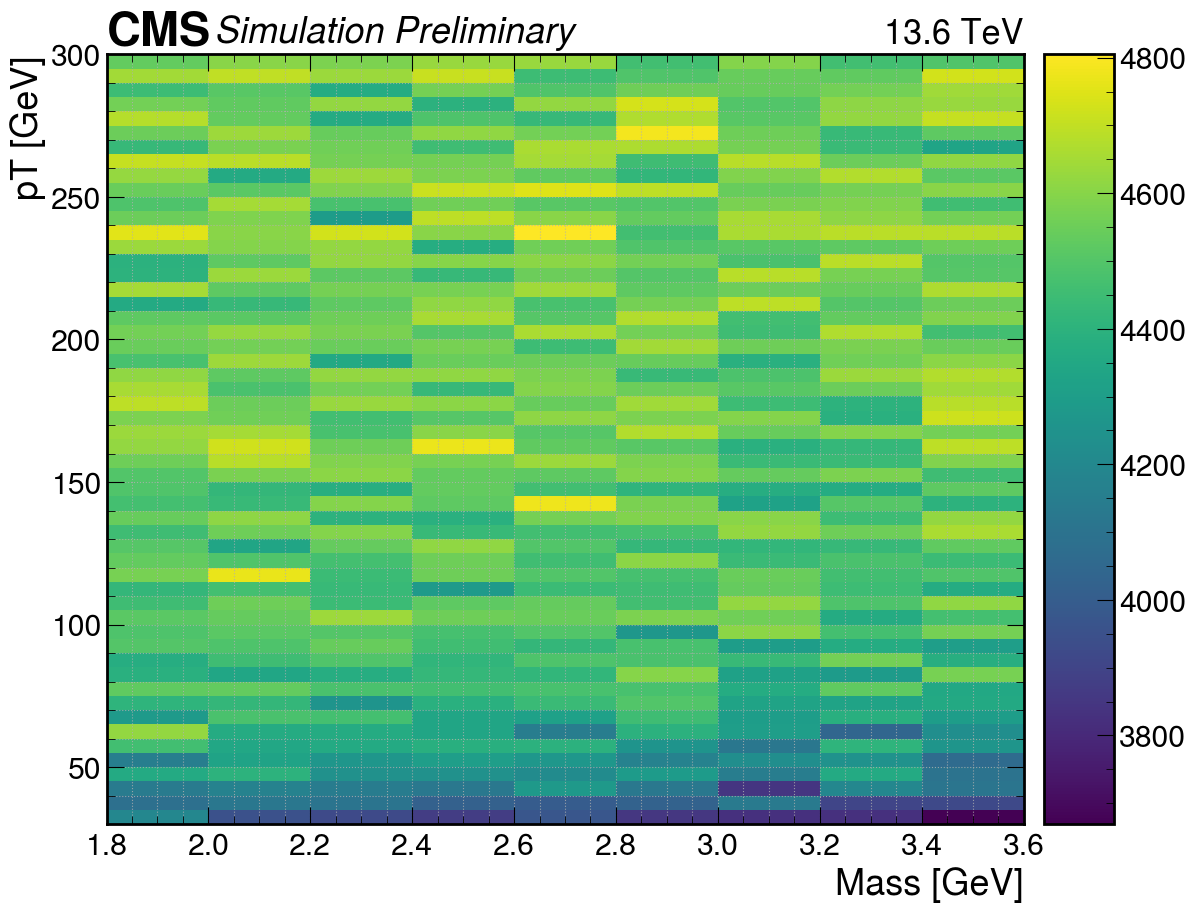

In [8]:
fig, ax = plt.subplots(figsize=(13,10))
# norm = mcolors.TwoSlopeNorm(vmin=0, vmax = 2000, vcenter=500)
out["train_dataset_unphysical"]["a_mass_pt"].plot2d()
# ax.set_xticks(np.arange(3.2, 17.2, 0.4), minor=True)
# ax.set_yticks(np.arange(20, 300, 5), minor=True)
# plt.xticks(np.arange(3.2,17.2,1.2))
plt.grid(which='both')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig(f'plots_massreg_dataset_1/a_mass_pt_2d_hist.png',facecolor='w',dpi=300)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation Preliminary'))

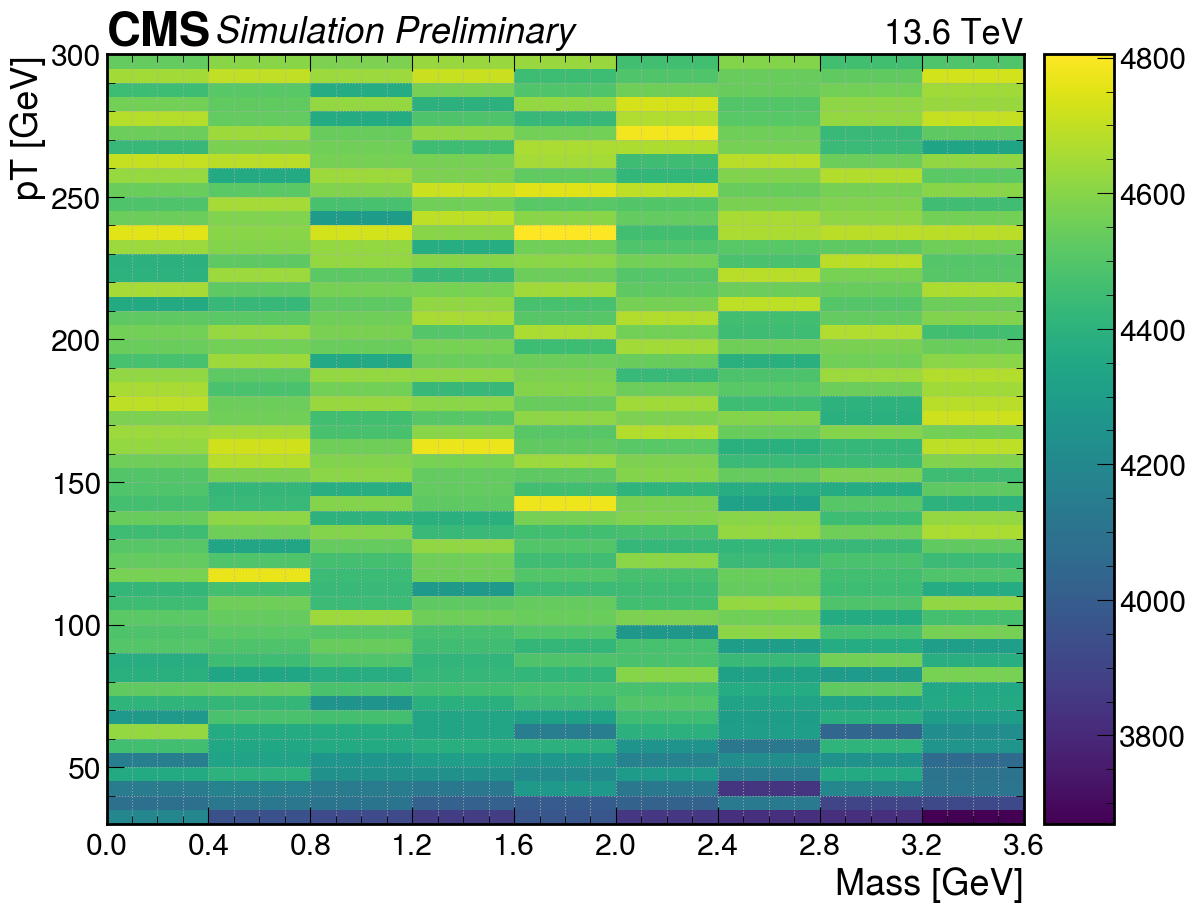

In [9]:
fig, ax = plt.subplots(figsize=(13,10))
# norm = mcolors.TwoSlopeNorm(vmin=0, vmax = 2000, vcenter=500)
out["train_dataset_unphysical"]["a_mass_pt_new"].plot2d()
# ax.set_xticks(np.arange(3.2, 17.2, 0.4), minor=True)
# ax.set_yticks(np.arange(20, 300, 5), minor=True)
# plt.xticks(np.arange(3.2,17.2,1.2))
plt.grid(which='both')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig(f'plots_massreg_dataset_1/a_mass_pt_2d_hist.png',facecolor='w',dpi=300)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation Preliminary'))

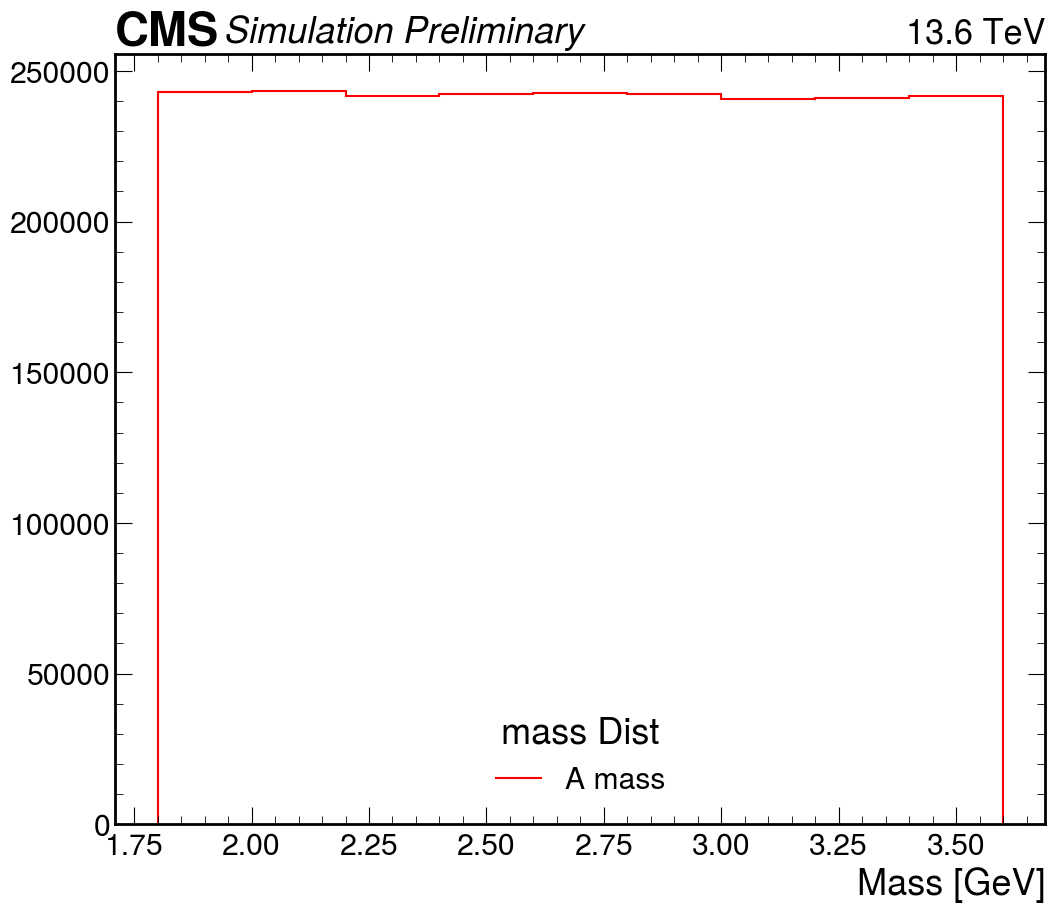

In [10]:
fig, ax = plt.subplots(figsize=(12,10))
out["train_dataset_unphysical"]["a_mass"].plot1d(ax=ax,histtype='step',color="r")
ax.legend(title="mass Dist")
# ax.set_xticks(np.arange(3.2, 17.2, 0.4), minor=True)
# plt.xticks(np.arange(3.2,17.2,1.2))
hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig(f'plots_massreg_dataset_1/a_mass_1d_hist.png',facecolor='w',dpi=300)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation Preliminary'))

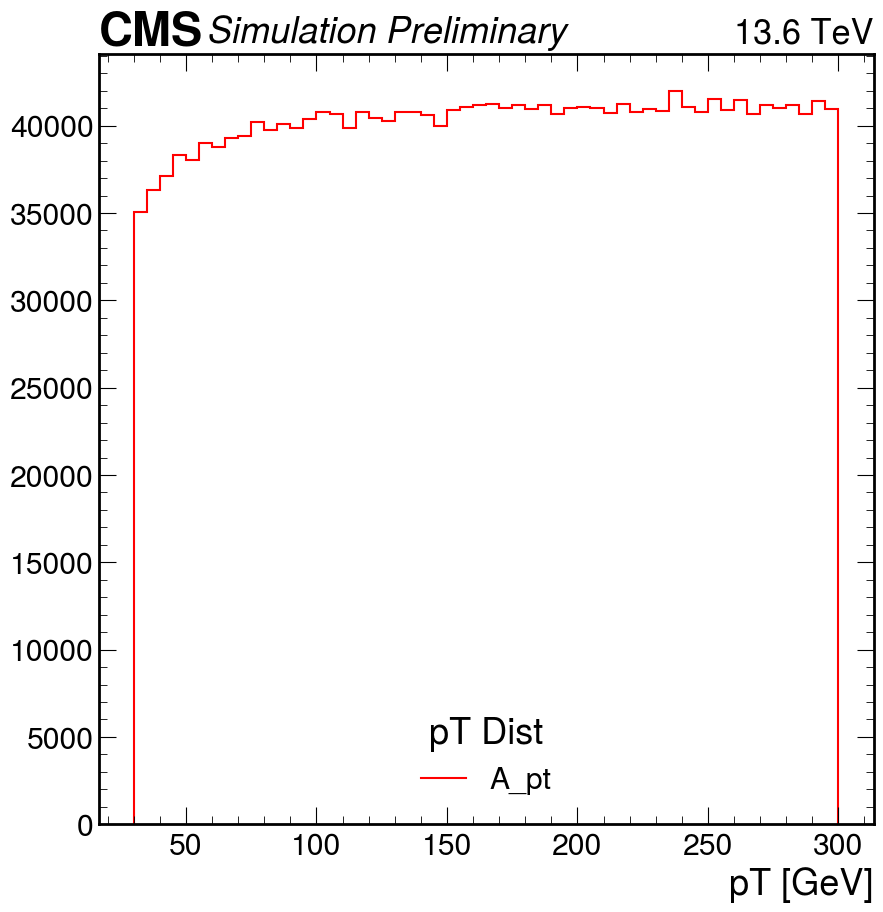

In [11]:
fig, ax = plt.subplots()
out["train_dataset_unphysical"]["a_pt"].plot1d(ax=ax,histtype='step',color="r")
# out["train_mass"]["tau2_pt"].plot1d(ax=ax,histtype='step',color="b")
# ax.set_yscale("log")
ax.legend(title="pT Dist")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig(f'plots_massreg_dataset_1/a_pt_1d_hist.png',facecolor='w',dpi=300)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation Preliminary'))

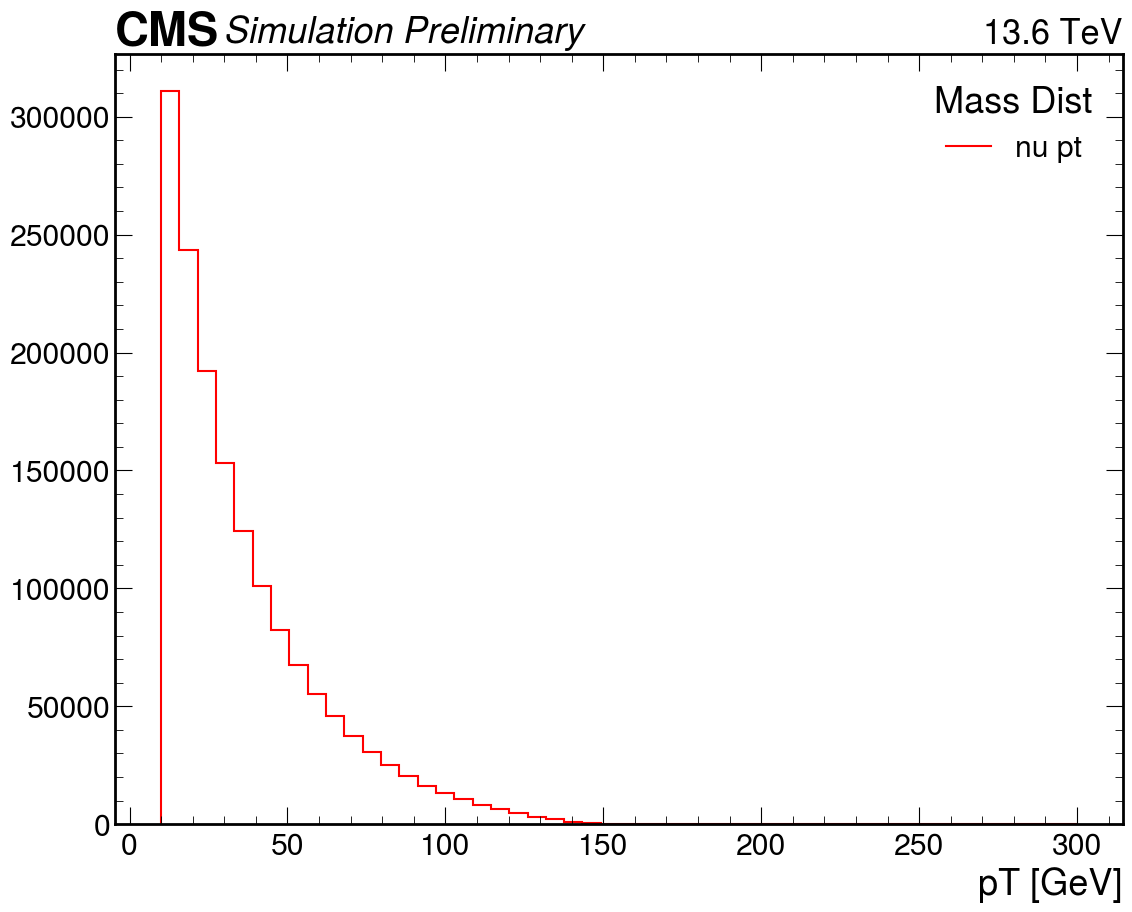

In [12]:
fig, ax = plt.subplots(figsize=(13,10))
# out["train_dataset_unphysical"]["tau1_pt"].plot1d(ax=ax,histtype='step',color='b',label="Tau pt")
out["train_dataset_unphysical"]["tau2_pt"].plot1d(ax=ax,histtype='step', color='r', label="nu pt")

# ax.set_yscale("log")
ax.legend(title="Mass Dist")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig(f'plots_massreg_dataset_1/tau1pttau2pt_hist.png',facecolor='w',dpi=300)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation Preliminary'))

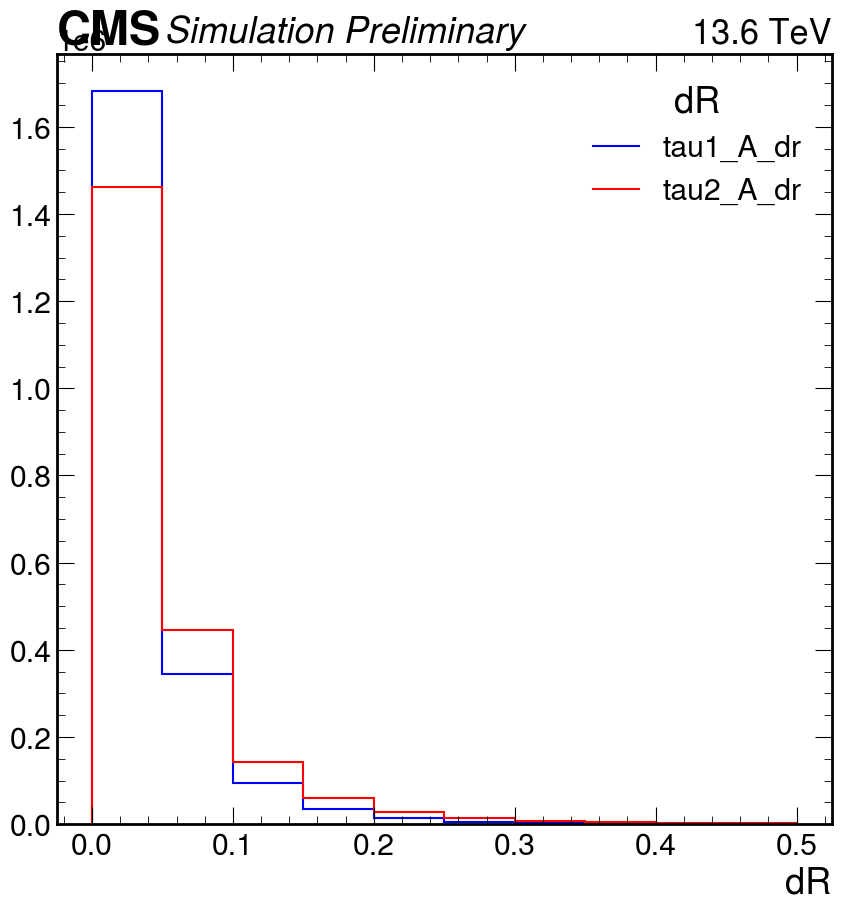

In [13]:
fig, ax = plt.subplots()
out["train_dataset_unphysical"]["tau1_A_dr"].plot1d(ax=ax,histtype='step',color='b')
out["train_dataset_unphysical"]["tau2_A_dr"].plot1d(ax=ax,histtype='step', color='r')

# ax.set_yscale("log")
ax.legend(title="dR")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig(f'plots_massreg_dataset_1/A_tau_dR_hist.png',facecolor='w',dpi=300)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation Preliminary'))

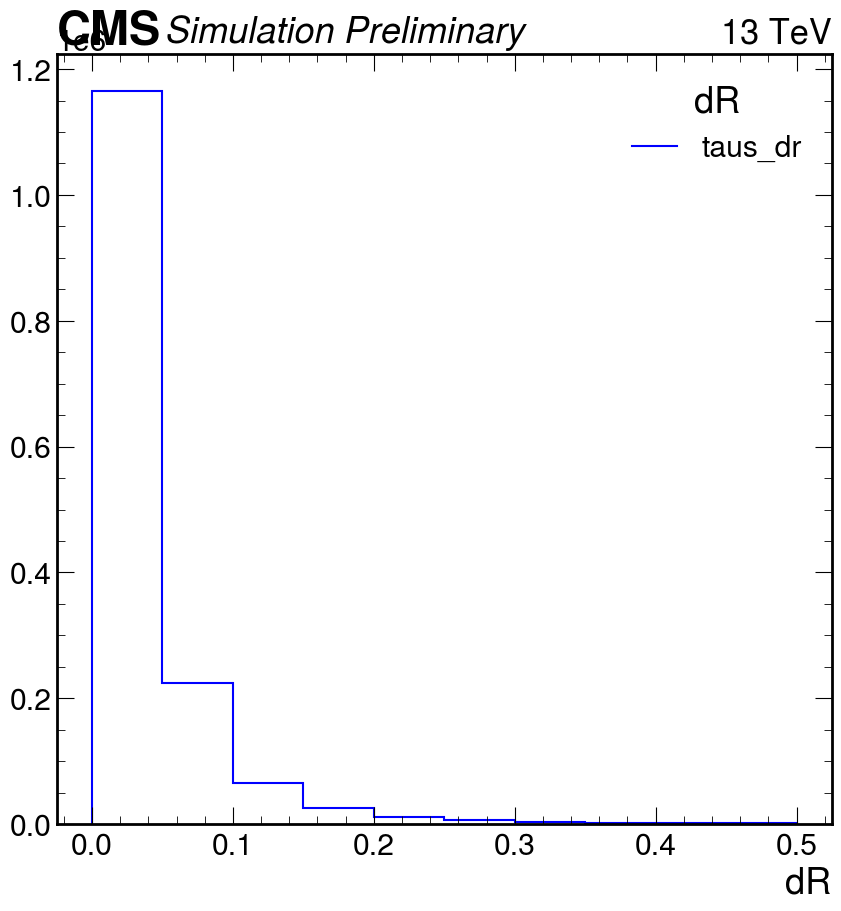

In [12]:
fig, ax = plt.subplots()
out["train_dataset_unphysical"]["taus_dr"].plot1d(ax=ax,histtype='step',color='b')

# ax.set_yscale("log")
ax.legend(title="dR")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig(f'plots_massreg_dataset_1/tau_tau_dR_hist.png',facecolor='w',dpi=300)

In [13]:
# Access the 2D histogram
A_mass_pt = out["train_dataset_unphysical"]["a_mass_pt"]

# Get the edges for each axis
mass_edges = A_mass_pt.axes[0].edges
pt_edges = A_mass_pt.axes[1].edges

# Print the bin edges
print("Mass Bin Edges:", mass_edges)
print("Pt Bin Edges:", pt_edges)

# Get the bin entries (counts in each bin)
bin_entries = A_mass_pt.values()

# print("min: ",min(bin_entries.flatten()), "max: ", max(bin_entries.flatten()), "mean: ", np.mean(bin_entries.flatten()))
outlist =bin_entries.flatten()
print("min---", min(outlist), "max---", max(outlist), "mean---", np.mean(outlist))
outstr = ""
# for i in range(len(outlist)):
for i in range(len(np.arange(1.6,3.7,0.4))*len(np.arange(35,301,5))):
  if (i%len(np.arange(35,301,5)) == 0) and (i != 0):
    outstr += '\n'
  outstr += str(int(outlist[i])) + ', '

print(outstr)

Mass Bin Edges: [1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6]
Pt Bin Edges: [ 30.  35.  40.  45.  50.  55.  60.  65.  70.  75.  80.  85.  90.  95.
 100. 105. 110. 115. 120. 125. 130. 135. 140. 145. 150. 155. 160. 165.
 170. 175. 180. 185. 190. 195. 200. 205. 210. 215. 220. 225. 230. 235.
 240. 245. 250. 255. 260. 265. 270. 275. 280. 285. 290. 295. 300.]
min--- 2356 max--- 3403 mean--- 3113.6769547325102
2874, 2871, 3037, 3076, 3163, 2954, 2997, 3074, 3040, 3111, 3193, 3227, 3119, 3121, 3244, 3157, 3140, 3036, 3237, 3168, 3045, 3129, 3073, 3114, 3096, 3103, 3072, 3248, 3264, 3171, 3198, 3175, 3249, 3215, 3193, 3388, 3272, 3177, 3224, 3082, 3138, 3157, 3161, 3114, 3165, 3347, 3247, 3115, 3194, 3147, 3298, 3257, 3051, 3224, 
2670, 2946, 2891, 3030, 3000, 3118, 3057, 3094, 3130, 3002, 3022, 3030, 3066, 3209, 3123, 3118, 3100, 3181, 3058, 3252, 3184, 3188, 3217, 3192, 3061, 3085, 3215, 3242, 3156, 3222, 3200, 3281, 3186, 3253, 3252, 3197, 3275, 3261, 3100, 3134, 3207, 3299, 3211, 3324, 3047, 31